# Inferência Bayseana - Notas de aula

In [228]:
import scipy
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

from datass.dataframe.inspection import _isnull

%matplotlib notebook

___
## # Aula 01 - 24/08/2021

In [2]:
None

___
## # Aula 02 - 31/08/2021

In [3]:
!ls

Lista_Métodos_Bayesianos.ipynb	notebook.ipynb	vehicles.csv


In [4]:
df = pd.read_csv('vehicles.csv')
df.shape

(426880, 26)

In [5]:
df.dtypes

id                int64
url              object
region           object
region_url       object
price             int64
year            float64
manufacturer     object
model            object
condition        object
cylinders        object
fuel             object
odometer        float64
title_status     object
transmission     object
VIN              object
drive            object
size             object
type             object
paint_color      object
image_url        object
description      object
county          float64
state            object
lat             float64
long            float64
posting_date     object
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

In [7]:
df.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


In [8]:
df.describe()

,id,price,year,odometer,county,lat,long
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05,0.0,420331.000000,420331.000000
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04,NaN,38.493940,-94.748599
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05,NaN,5.841533,18.365462
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00,NaN,-84.122245,-159.827728
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04,NaN,34.601900,-111.939847
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04,NaN,39.150100,-88.432600
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05,NaN,42.398900,-80.832039
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07,NaN,82.390818,173.885502


### A partir de agora, vamos trabalhar com o atributo `price`.

In [9]:
df[pd.isnull(df['price'])].shape[0]

0

In [10]:
_ = stats.mode(df['price'])
print(f'Coluna: "price"\nModa: {_[0][0]}\nQuantidade: {_[1][0]}')

Coluna: "price"
Moda: 0
Quantidade: 32895


In [30]:
precos = df['price'].to_numpy()
precos.sort()

type(precos), precos.shape

(numpy.ndarray, (426880,))

In [29]:
[_ for _ in precos[::int(len(precos)/15)]]

[0,
 0,
 2500,
 4500,
 6000,
 7995,
 9995,
 12500,
 14997,
 17990,
 21396,
 25000,
 29777,
 34590,
 40600,
 987654321]

In [220]:
PERCENTIL = 0.01

percentil_inf = PERCENTIL
percentil_sup = 1 - PERCENTIL

menor_indice = int(len(precos) * percentil_inf)
maior_indice = int(len(precos) * percentil_sup)

len(precos), menor_indice, maior_indice

(418343, 4183, 414159)

In [33]:
amostra_sem_outliers = prices[menor_indice:maior_indice]

print(
    f'Removidos: {len(prices) - len(amostra_sem_outliers)}\n'
    + f'Sem outliers: {len(amostra_sem_outliers)}'
)

Removidos: 8537
Sem outliers: 418343


In [34]:
amostra_sem_outliers[::int(len(amostra_sem_outliers)/15)]

array([    0,     0,  2700,  4700,  6400,  7995,  9995, 12500, 14995,
       17990, 20995, 24995, 28996, 33990, 39990, 66995])

<IPython.core.display.Javascript object>


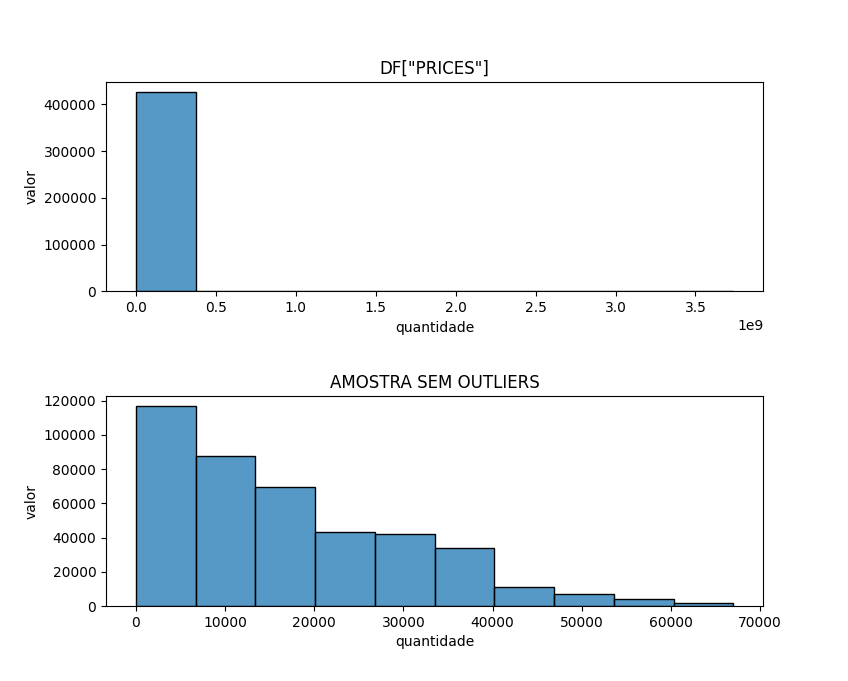

In [35]:
PLT_ROWS, PLT_COLS, PLT_INDEX = 2, 1, 1

_ = zip(('todos os preços', 'amostra sem outliers'), (precos, amostra_sem_outliers))
for titulo, dados in _:
    plt.subplot(PLT_ROWS, PLT_COLS, PLT_INDEX)
    sns.histplot(data=dados, bins=10)
    plt.title(titulo.upper())
    plt.xlabel('quantidade')
    plt.ylabel('valor')
    PLT_INDEX += 1

plt.subplots_adjust(wspace=0.25, hspace=0.50)
plt.show()

### Normalizar os dados

In [39]:
scaler_precos = StandardScaler().fit(amostra_sem_outliers.reshape(-1, 1))
scaler_precos

StandardScaler()

In [45]:
precos_normalizados = scaler_precos.transform(amostra_sem_outliers.reshape(-1, 1))

[_ for _ in precos_normalizados[::int(len(precos_normalizados)/15)]]

[array([-1.23096557]),
 array([-1.23096557]),
 array([-1.03468607]),
 array([-0.88929386]),
 array([-0.76571047]),
 array([-0.64976018]),
 array([-0.50436796]),
 array([-0.32226421]),
 array([-0.14088742]),
 array([0.07683742]),
 array([0.29528923]),
 array([0.58607366]),
 array([0.87693079]),
 array([1.23997515]),
 array([1.6761518]),
 array([3.6393102])]

In [88]:
print(
    '# Preços normalizados'
    + f'\nMédia: {precos_normalizados.mean():.4f}'
    + f'\nDesvio padrão: {precos_normalizados.std():.4f}'
    + f'\nMin: {precos_normalizados.min():.4f}'
    + f'\nMax: {precos_normalizados.max():.4f}'
)

# Preços normalizados
Média: 0.0000
Desvio padrão: 1.0000
Min: -1.2310
Max: 3.6393


<IPython.core.display.Javascript object>


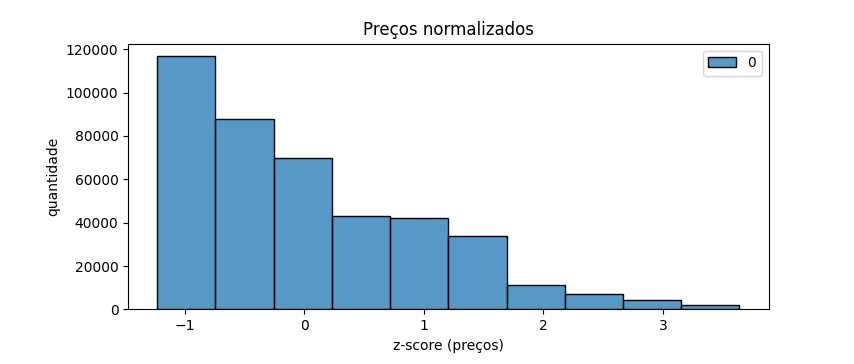

In [128]:
sns.histplot(precos_normalizados, bins=10)
plt.title('Preços normalizados')
plt.xlabel('z-score (preços)')
plt.ylabel('quantidade')

plt.subplots_adjust(bottom=0.15, left=0.15)
plt.show()

Provavelmente se trata de uma distribuição exponencial

In [130]:
bins_percentil = np.linspace(start=0, stop=100, num=11)

bins_percentil # extremos dos intervalos

array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.])

In [111]:
valores_percentil = np.percentile(a=precos_normalizados, q=bins_percentil)

valores_percentil # valores de cada supremo dos intervalos

array([-1.23096557, -1.15863294, -0.88929386, -0.7221655 , -0.50436796,
       -0.21685486,  0.07683742,  0.44068144,  0.87700348,  1.42898503,
        3.6393102 ])

In [166]:
freq_precos, bins_precos = np.histogram(precos_normalizados, bins=valores_percentil)

freq_precos, bins_precos

(array([41818, 41847, 41220, 41574, 42516, 42002, 41413, 42281, 40595,
        43077]),
 array([-1.23096557, -1.15863294, -0.88929386, -0.7221655 , -0.50436796,
        -0.21685486,  0.07683742,  0.44068144,  0.87700348,  1.42898503,
         3.6393102 ]))

<IPython.core.display.Javascript object>


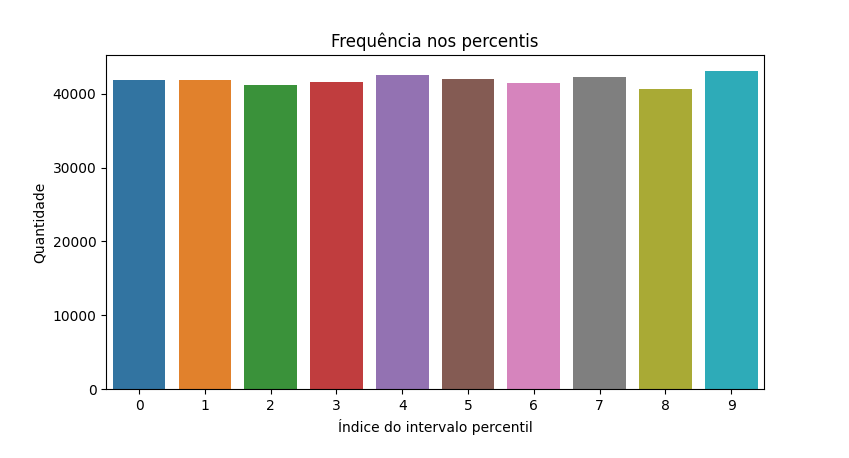

In [168]:
sns.barplot(x=[*range(len(freq_precos))], y=freq_precos)
plt.title('Frequência nos percentis')
plt.ylabel('Quantidade')
plt.xlabel('Índice do intervalo percentil')
plt.subplots_adjust(bottom=0.15
plt.show()

<IPython.core.display.Javascript object>


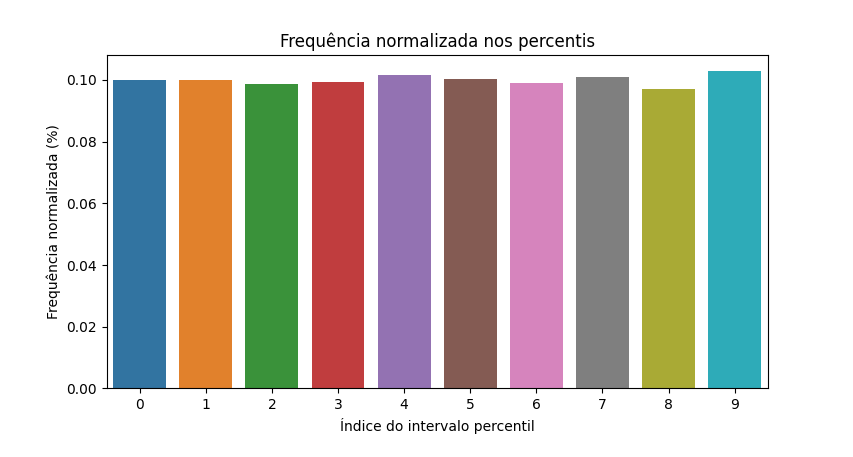

In [217]:
sns.barplot(x=[*range(len(freq_precos))], y=freq_precos/sum(freq_precos))
plt.title('Frequência normalizada nos percentis')
plt.ylabel('Frequência normalizada (%)')
plt.xlabel('Índice do intervalo percentil')
plt.subplots_adjust(bottom=0.15)
plt.show()

<IPython.core.display.Javascript object>


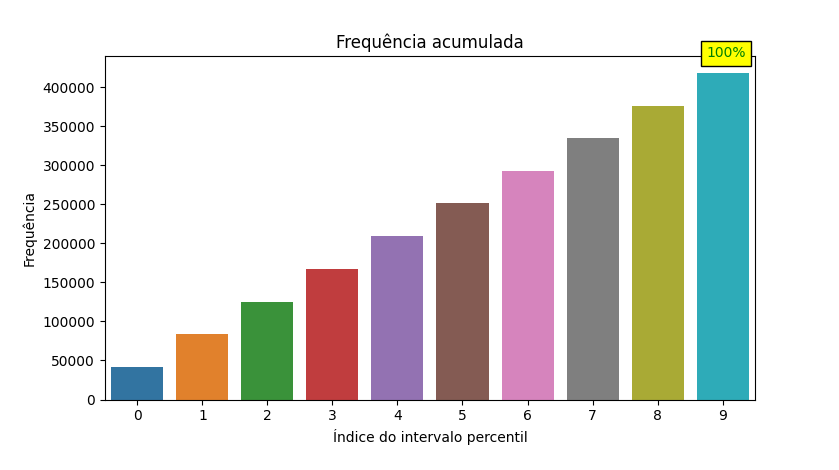

In [244]:
frequencia_precos_acumulada = np.cumsum(freq_precos)

sns.barplot(x=[*range(len(freq_precos))], y=frequencia_precos_acumulada)
plt.title('Frequência acumulada')
plt.ylabel('Frequência')
plt.xlabel('Índice do intervalo percentil')
plt.text(x=8.75, y=frequencia_precos_acumulada[-1]+2e4, s='100%',
         backgroundcolor='yellow',
         fontdict=dict(color='green',size=10),
         bbox=dict(facecolor='yellow')
        )
plt.subplots_adjust(bottom=0.15)
plt.show()

<IPython.core.display.Javascript object>


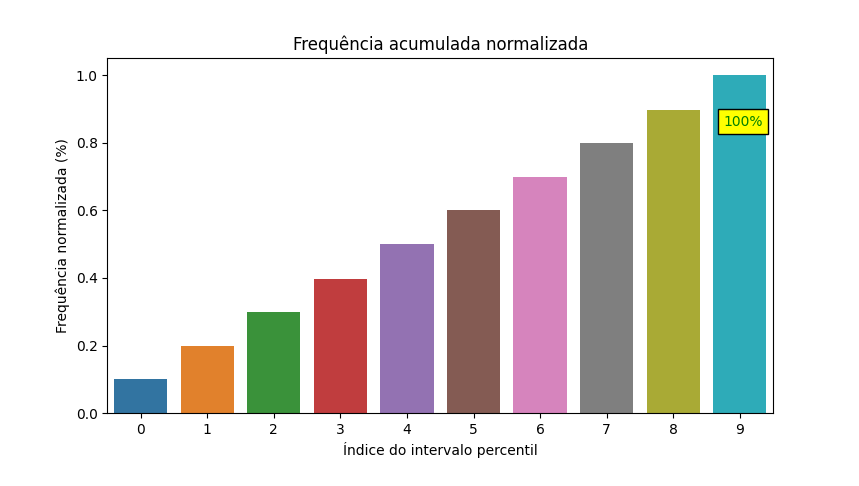

In [245]:
sns.barplot(x=[*range(len(freq_precos))], y=frequencia_precos_acumulada/sum(freq_precos))
plt.title('Frequência acumulada normalizada')
plt.ylabel('Frequência normalizada (%)')
plt.xlabel('Índice do intervalo percentil')
plt.text(x=8.75, y=0.85, s='100%',
         backgroundcolor='yellow',
         fontdict=dict(color='green',size=10),
         bbox=dict(facecolor='yellow')
        )
plt.subplots_adjust(bottom=0.15)
plt.show()

### Chi-quadrado

Realizaremos um teste `Chi-quadrado`: Encontrar o tipo de distribuição que mais se aproxima ao nosso conjunto de dados

In [227]:
CHI_QUADRADO = []

DISTRIBUICOES = ['beta', 'expon', 'gamma', 'invgauss', 'lognorm', 'norm',
                 'pearson3', 'triang', 'uniform', 'weibull_max', 'weibull_min']

In [261]:
CHI_QUADRADO_METRICAS = []
PARAMS_DISTS = {}

for d in DISTRIBUICOES:
    dist = getattr(scipy.stats, d)

    params = dist.fit(precos_normalizados)
    PARAMS_DISTS[d] = params
#     print(f'Distribuição: {d.upper()}.\n\tParams MLE: {params}')

    cdf_fitted = dist.cdf(valores_percentil, *params)

    frequencia_esperada = []
    for b in range(len(bins_percentil) - 1):
        delta_area_cdf_esperada = cdf_fitted[b + 1] - cdf_fitted[b]
        frequencia_esperada.append(delta_area_cdf_esperada)

    frequencia_esperada = np.array(frequencia_esperada) * len(amostra_sem_outliers)
    frequencia_esperada_acc = np.cumsum(frequencia_esperada)
    
    ss = ((frequencia_esperada_acc - frequencia_precos_acumulada)**2)/frequencia_esperada_acc
    ss = round(sum(ss, 0))
    CHI_QUADRADO_METRICAS.append(ss)

In [286]:
for k, v in PARAMS_DISTS.items():
    print(f'Distribuição: {k.upper()}.\nParams MLE: {v}\n')

Distribuição: BETA.
Params MLE: (0.2388065831255009, 1.1637717506536793, -1.2309655655757914, 4.875420610758933)

Distribuição: EXPON.
Params MLE: (-1.2309655655757912, 1.2309655655757912)

Distribuição: GAMMA.
Params MLE: (0.28615908876435625, -1.2309655655757914, 2.4666839140894092)

Distribuição: INVGAUSS.
Params MLE: (0.4378971820264218, -1.7139769095439341, 3.914109314358006)

Distribuição: LOGNORM.
Params MLE: (0.650400860729848, -1.6419230132341776, 1.3486149895274293)

Distribuição: NORM.
Params MLE: (7.228685273555399e-17, 1.0000000000000002)

Distribuição: PEARSON3.
Params MLE: (3.0863364170339063, -1.0194012239829828e-16, 1.899586926575652)

Distribuição: TRIANG.
Params MLE: (1.0669949724732894e-05, -1.2310179519947297, 4.9022556554729775)

Distribuição: UNIFORM.
Params MLE: (-1.2309655655757912, 4.8702757683572795)

Distribuição: WEIBULL_MAX.
Params MLE: (60766023.79812332, 45600214.70001962, 45600215.15492992)

Distribuição: WEIBULL_MIN.
Params MLE: (0.3562420727425598, -1

In [255]:
resultados_chi_quadrado = pd.DataFrame(zip(DISTRIBUICOES, CHI_QUADRADO_METRICAS),
                          columns=['Distribuições', 'chi-quadrado'])
resultados_chi_quadrado.sort_values(by='chi-quadrado', inplace=True)
resultados_chi_quadrado.head(10)

,Distribuições,chi-quadrado
1,expon,26966
3,invgauss,109612
4,lognorm,119396
6,pearson3,178632
7,triang,194391
10,weibull_min,249137
9,weibull_max,255234
0,beta,343355
2,gamma,456130
5,norm,594715


<IPython.core.display.Javascript object>


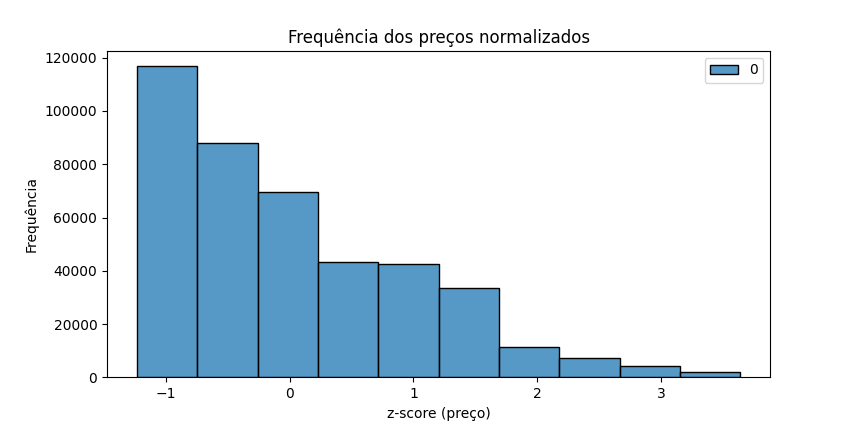

In [310]:
sns.histplot(precos_normalizados, bins=10)
plt.title('Frequência dos preços normalizados')
plt.xlabel('z-score (preço)')
plt.ylabel('Frequência')
plt.show()

In [315]:
# deslocar para direita ( > 0)
__ = abs(precos_normalizados.min())
_ = [p + __ for p in precos_normalizados]

<IPython.core.display.Javascript object>


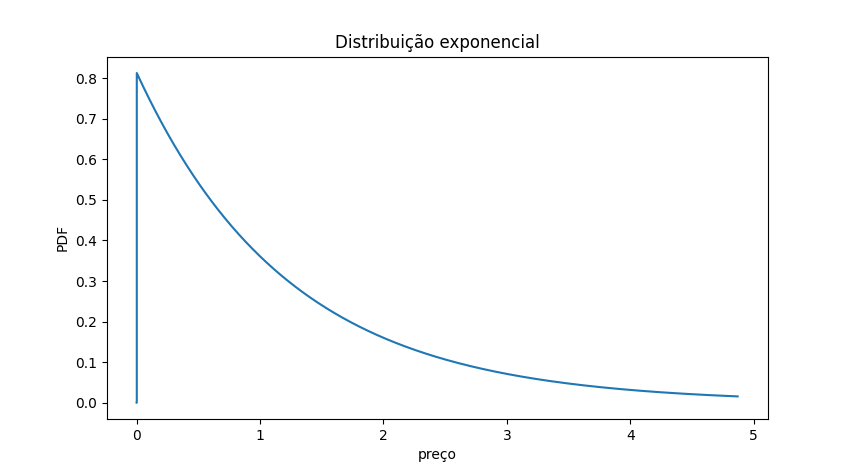

In [316]:
plt.plot(_, scipy.stats.expon.pdf(precos_normalizados, -1.23, 1.23))
plt.title('Distribuição exponencial')
plt.xlabel('preço')
plt.ylabel('PDF')
plt.show()